In [1]:
#importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:

df = df[df['job_title_short']== 'Data Analyst']

<Axes: xlabel='job_posted_month_no'>

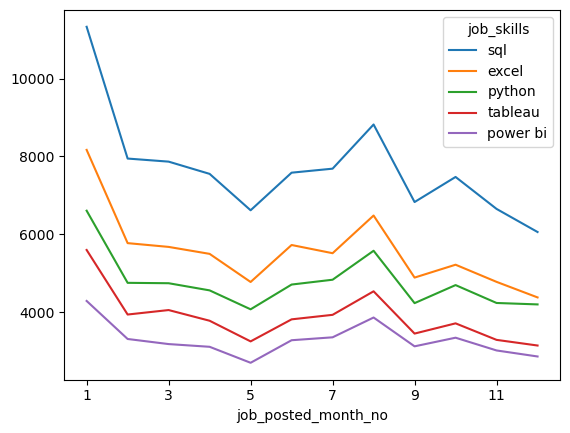

In [3]:
df_DA = df[df['job_title_short']== 'Data Analyst'].copy()
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_explode = df_DA.explode('job_skills')

df_DA_pivot = df_DA_explode.pivot_table(index= 'job_posted_month_no', columns='job_skills', aggfunc= 'size', fill_value=0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot.loc['Total'].sort_values(ascending=False).index

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot = df_DA_pivot.drop('Total')







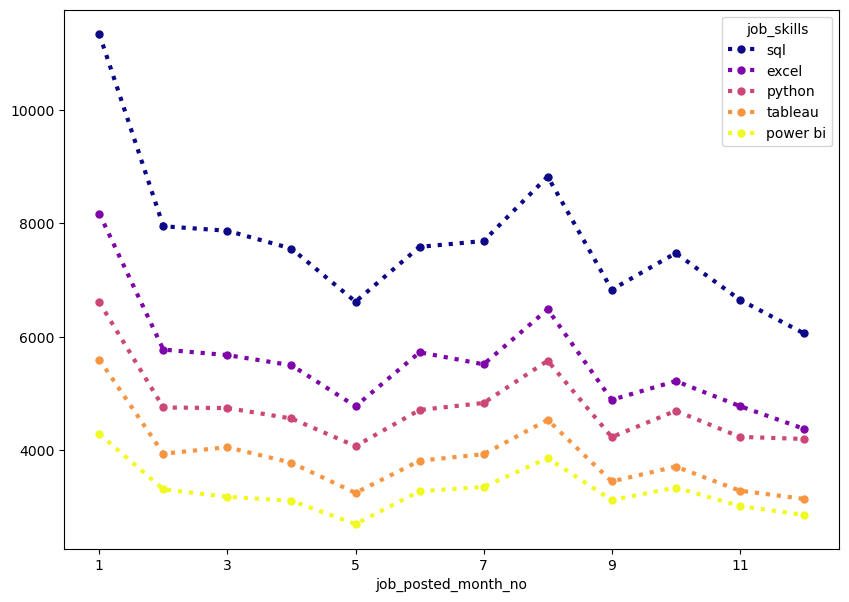

In [13]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=3, 
    linestyle= ':',
    colormap='plasma',
    marker = 'o',
    markersize=5,
    figsize=(10,7)
    )

plt.show()

In [17]:
from adjustText import adjust_text

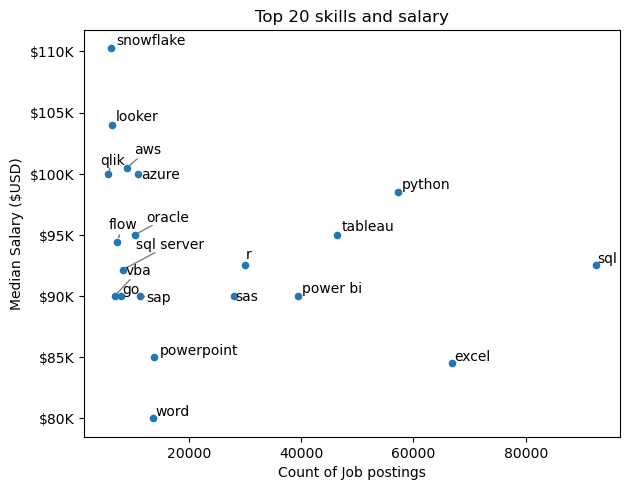

In [26]:




df_exploded = df_DA.explode('job_skills')



skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'), #making new column, key, value, tuple, aggregation method
    median_salary = ('salary_year_avg', 'median')
)

skill_count = 20
skill_stats = skill_stats.sort_values(by= 'skill_count', ascending= False).head(skill_count)
skill_stats.plot(kind= 'scatter', x= 'skill_count', y='median_salary')

texts = [] #empty list

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i],txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color = 'gray'))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos : f'${int(y/1000)}K'))

plt.xlabel("Count of Job postings")
plt.ylabel("Median Salary ($USD)")
plt.tight_layout()
plt.title(f"Top {skill_count} skills and salary")
plt.show()